In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('us_perm_visas.csv')
df.shape

(374362, 154)

In [3]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [4]:
df.sample(1)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
127622,NaN,NaN,NaN,NaN,MAILEDIN,A-14269-10543,NaN,NaN,Denied,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,5000.0,Month


In [5]:
print(df.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

In [6]:
df['case_number'].isna().sum()

np.int64(135269)

In [7]:
casenoindex = df.columns.get_loc('case_no')  # get_loc to get the column index
casenumberindex  = df.columns.get_loc('case_number')

casenumberlist = []
for value in df.iloc[0:135269, casenoindex]:
    casenumberlist.append(value)
for value in df.iloc[135269:374362, casenumberindex]:
    casenumberlist.append(value)

df['casenumber'] = casenumberlist

In [8]:
df.drop(['case_no','case_number'],axis=1, inplace=True)
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_received_date', 'case_status',
       'class_of_admission', 'country_of_citizenship', 'country_of_citzenship',
       ...
       'ri_us_workers_considered', 'schd_a_sheepherder', 'us_economic_sector',
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089', 'casenumber'],
      dtype='object', length=153)

In [9]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [10]:
for value in df.case_status.unique():
    print(len(df[df['case_status'] == value]), " occurrence of stats '{}' ".format(value))
# you can also use value_counts. 

181933  occurrence of stats 'Certified' 
25649  occurrence of stats 'Denied' 
148586  occurrence of stats 'Certified-Expired' 
18194  occurrence of stats 'Withdrawn' 


In [11]:
df = df[df.case_status != 'Withdrawn']

In [12]:
df.case_status.value_counts()

case_status
Certified            181933
Certified-Expired    148586
Denied                25649
Name: count, dtype: int64

In [13]:
df.loc[df.case_status == "Certified-Expired", "case_status"] = "Certified"

In [14]:
df.case_status.value_counts(normalize= True)*100

case_status
Certified    92.798623
Denied        7.201377
Name: proportion, dtype: float64

In [15]:
# dropping all empty rows and columns
df.dropna(axis = 1, how= 'all', inplace=True)
df.dropna(axis = 0, how= 'all', inplace=True)

In [16]:
for columns in df.columns:
    print(f"The missing values for {columns} is {df[columns].isnull().sum()}")

The missing values for add_these_pw_job_title_9089 is 317031
The missing values for agent_city is 153452
The missing values for agent_firm_name is 157646
The missing values for agent_state is 156544
The missing values for application_type is 229320
The missing values for case_received_date is 126848
The missing values for case_status is 0
The missing values for class_of_admission is 21085
The missing values for country_of_citizenship is 19272
The missing values for country_of_citzenship is 336951
The missing values for decision_date is 0
The missing values for employer_address_1 is 37
The missing values for employer_address_2 is 236133
The missing values for employer_city is 10
The missing values for employer_country is 126920
The missing values for employer_decl_info_title is 126886
The missing values for employer_name is 8
The missing values for employer_num_employees is 126925
The missing values for employer_phone is 126883
The missing values for employer_phone_ext is 333670
The mis

In [17]:
df['decision_date'] = pd.to_datetime(df['decision_date'])
df['year'] = df['decision_date'].dt.year
df['month'] = df['decision_date'].dt.month
df['day'] = df['decision_date'].dt.day
df.drop('decision_date',axis = 1, inplace=True)

<Axes: xlabel='year', ylabel='count'>

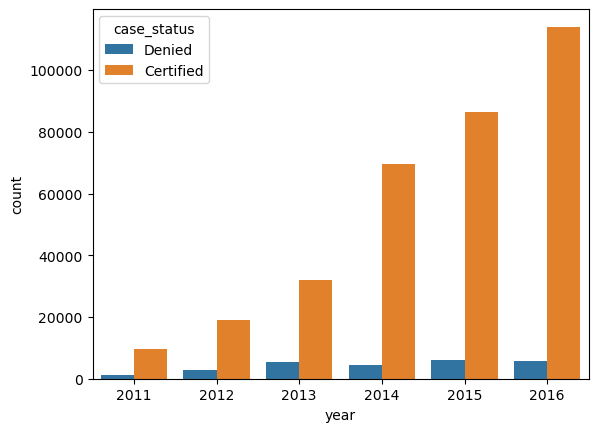

In [18]:
sns.countplot(x = 'year', hue = 'case_status', data = df)

In [19]:
df.employer_city.unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'austin',
       'Carson City', 'Northfield'], dtype=object)

In [20]:
df.employer_city.value_counts()

employer_city
NEW YORK           15992
COLLEGE STATION    11983
SANTA CLARA        10446
SAN JOSE            9004
REDMOND             8469
                   ...  
Goldsboro              1
Sealy                  1
austin                 1
Carson City            1
TREMONTON              1
Name: count, Length: 8324, dtype: int64

In [21]:
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].unique()

array(['NEW YORK', 'CARLSTADT', 'GLEN ALLEN', ..., 'PERRYSVILLE',
       'STILWELL', 'ROYAL OAKS'], dtype=object)

<Axes: xlabel='employer_city', ylabel='count'>

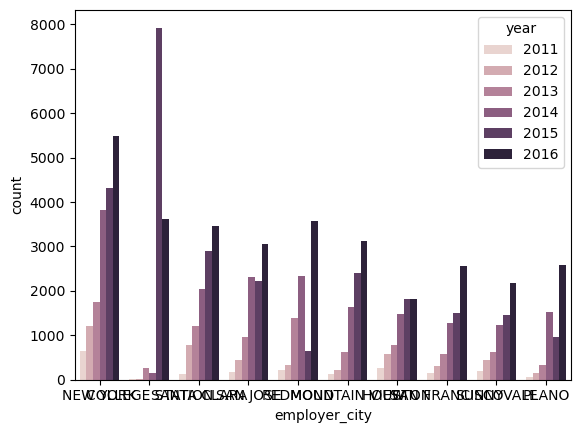

In [22]:
sns.countplot( x='employer_city', hue='year', data=df, 
              order=df['employer_city'].value_counts().iloc[:10].index )

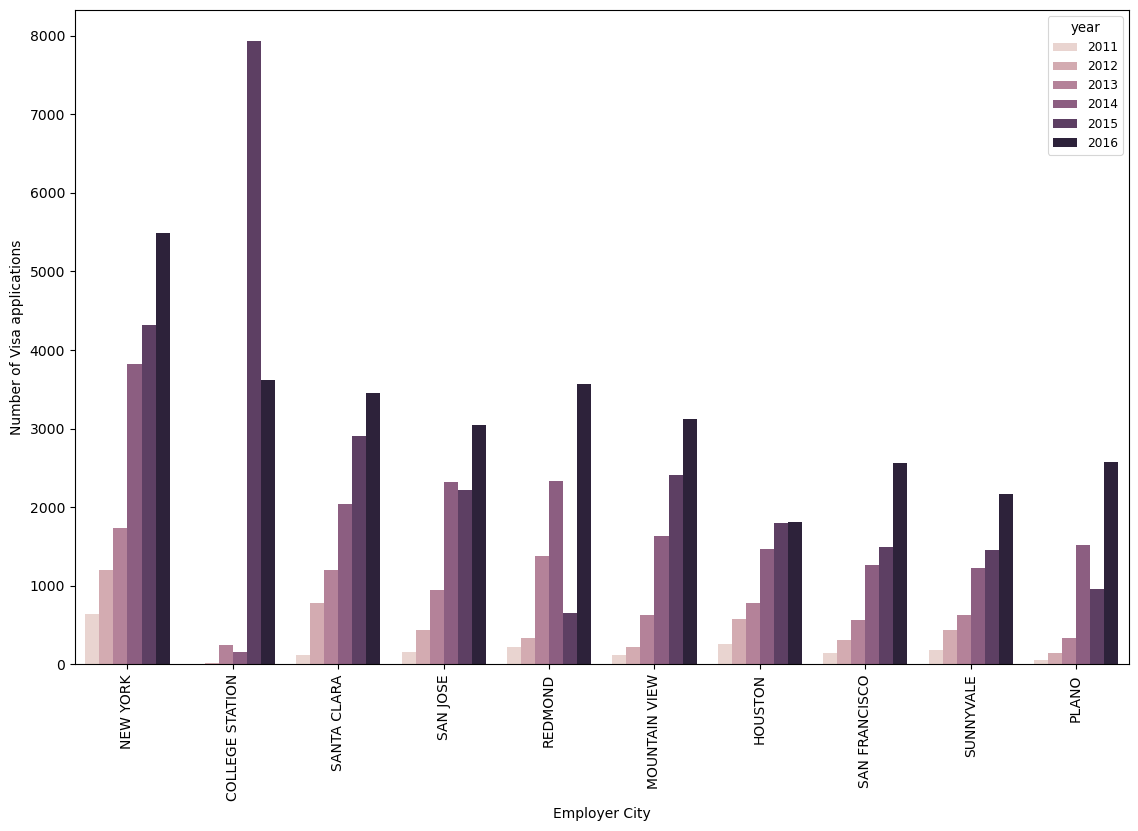

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(13.6,8.5)
sns.set_context("paper",rc = {"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot( x='employer_city', hue='year', data=df, 
              order=df['employer_city'].value_counts().iloc[:10].index )
plt.xticks(rotation = 90)
ax.set(xlabel= 'Employer City', ylabel= 'Number of Visa applications')
plt.show()

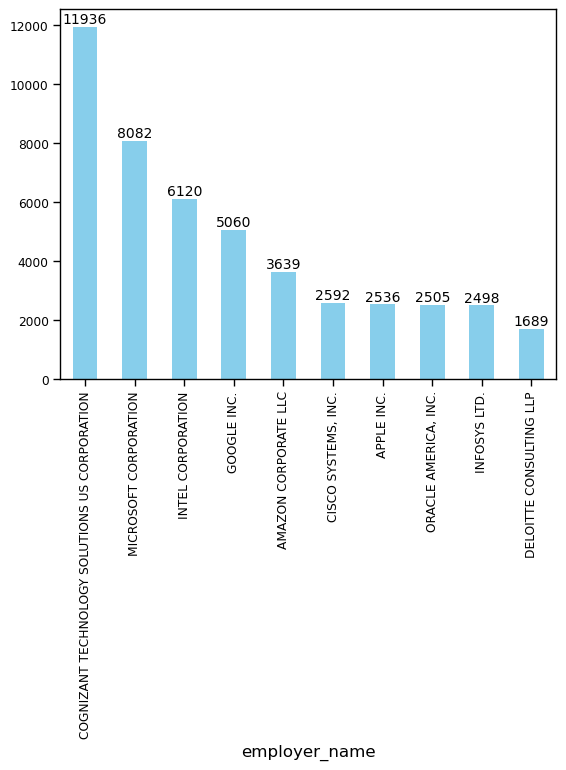

In [24]:
top_emp = df['employer_name'].value_counts().head(10)
top_emp.plot(kind = 'bar', color = 'skyblue')
for i, v in enumerate(top_emp):
    plt.text(i, v+10, str(v), ha = 'center', va = 'bottom', fontsize=10)

In [25]:
us_economic_counts = {}
for value in df['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] = 1
us_economic_counts

{'IT': 49311,
 'Other Economic Sector': 14662,
 'Aerospace': 3917,
 'Advanced Mfg': 17601,
 'Educational Services': 8561,
 'Retail': 4208,
 'Construction': 1315,
 'Hospitality': 1767,
 'Automotive': 1084,
 'Health Care': 6407,
 'Agribusiness': 784,
 'Finance': 8686,
 'Energy': 1021,
 'Transportation': 893,
 'Homeland Security': 78,
 'Biotechnology': 436,
 'Geospatial': 137}

In [26]:
usecollabels = []
usecolvalues = []
for key, value in us_economic_counts.items():
    usecollabels.append(key)
    usecolvalues.append(value)

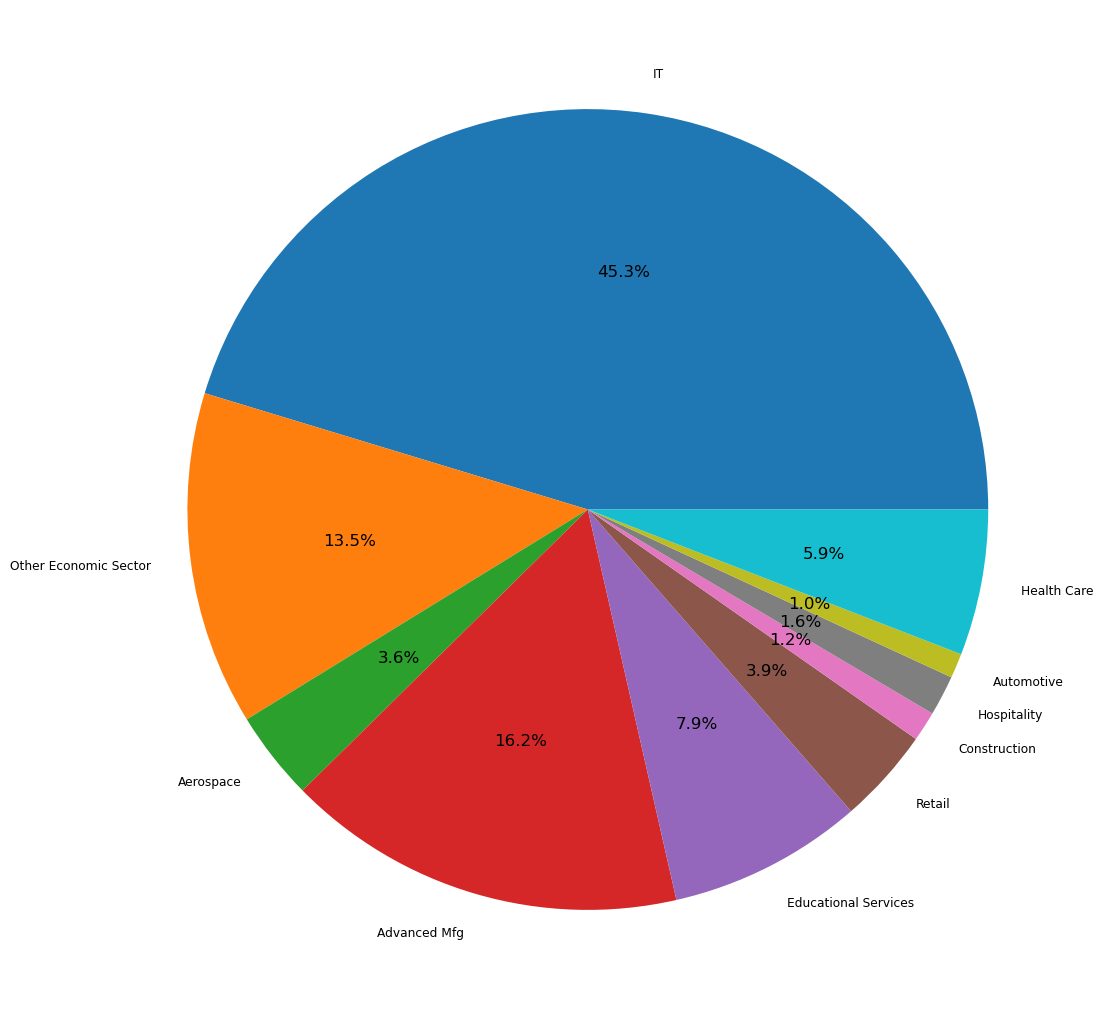

In [28]:
plt.figure(figsize= (13,13))
plt.pie(usecolvalues[:10], labels = usecollabels[:10],autopct = '%1.1f%%')
plt.show()

In [29]:
df.job_info_job_title.value_counts()[:20]

job_info_job_title
Software Engineer                   14372
Computer Systems Analyst - V         4747
Senior Software Engineer             3801
Computer Systems Analyst - II        3416
Software Developer                   2880
Assistant Professor                  2604
Programmer Analyst                   2534
Computer Systems Analyst - IV        2496
Systems Analyst                      2034
Software Development Engineer II     1630
Poultry Processing Worker            1594
Component Design Engineer            1064
Poultry Processor                    1037
Business Analyst                      963
software engineer                     932
SOFTWARE ENGINEER                     877
Senior Programmer Analyst             862
Sr. Software Engineer                 847
Senior Software Developer             817
Commercial Cleaner                    802
Name: count, dtype: int64

In [30]:
# converting to lower case 
df.job_info_job_title = df.job_info_job_title.str.lower()

df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]

df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()

df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.','senior')

df['job_info_job_title'].replace(['NaN','NaT','nan'], np.nan, inplace=True)

df['job_info_job_title'].value_counts(dropna=True)[:10]

job_info_job_title
software engineer                18582
computer systems analyst         12054
senior software engineer          5802
software developer                4501
programmer analyst                3763
assistant professor               2869
software development engineer     2766
systems analyst                   2587
senior programmer analyst         1884
senior software developer         1625
Name: count, dtype: int64

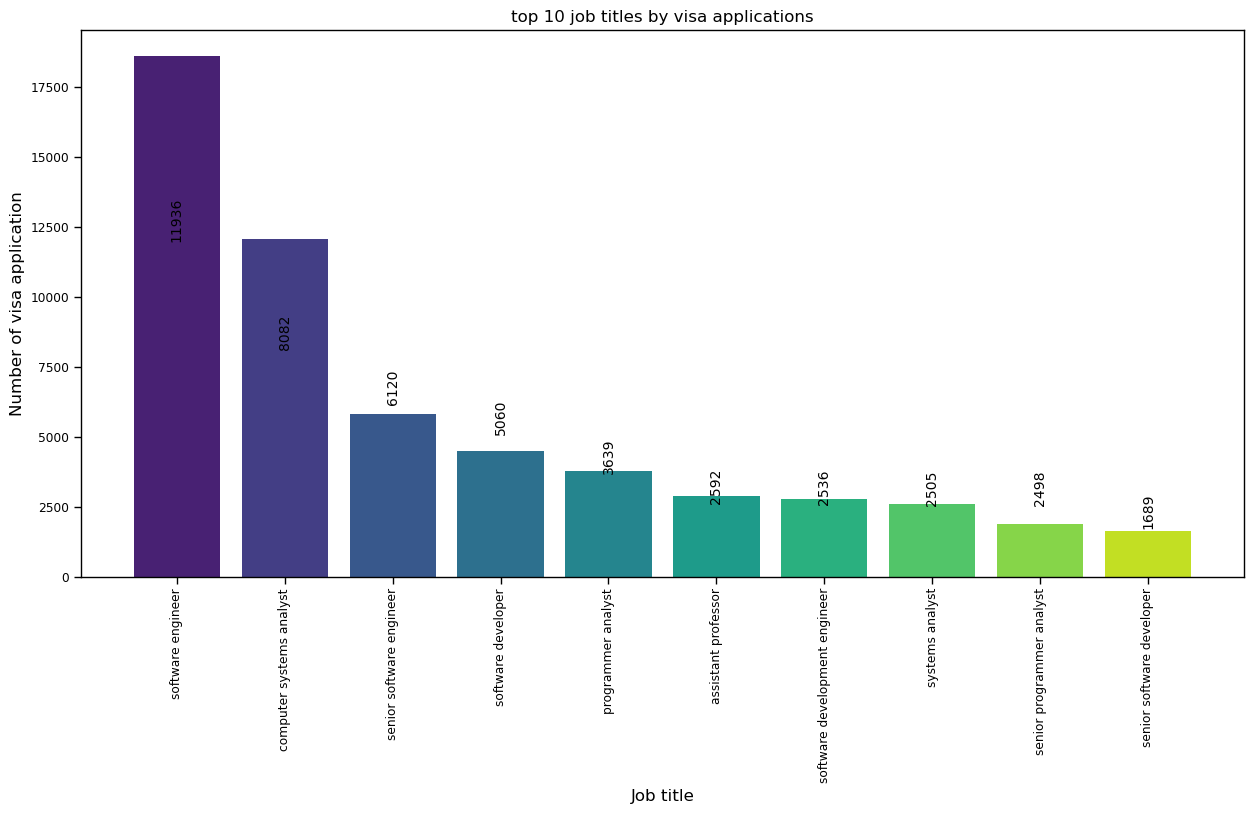

In [31]:
top_job_titles = df.job_info_job_title.value_counts().head(10)

plt.figure(figsize= (12.7,8.3))
plt.bar(top_job_titles.index, top_job_titles, color = sns.color_palette('viridis',len(top_job_titles)))

for i, v in enumerate(top_emp):
    plt.text(i, v+10, str(v), ha = 'center', va = 'bottom', fontsize=10, rotation = 90)

plt.xlabel('Job title')
plt.ylabel('Number of visa application')
plt.title("top 10 job titles by visa applications")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [32]:
df.country_of_citizenship = pd.Categorical(df.country_of_citizenship)

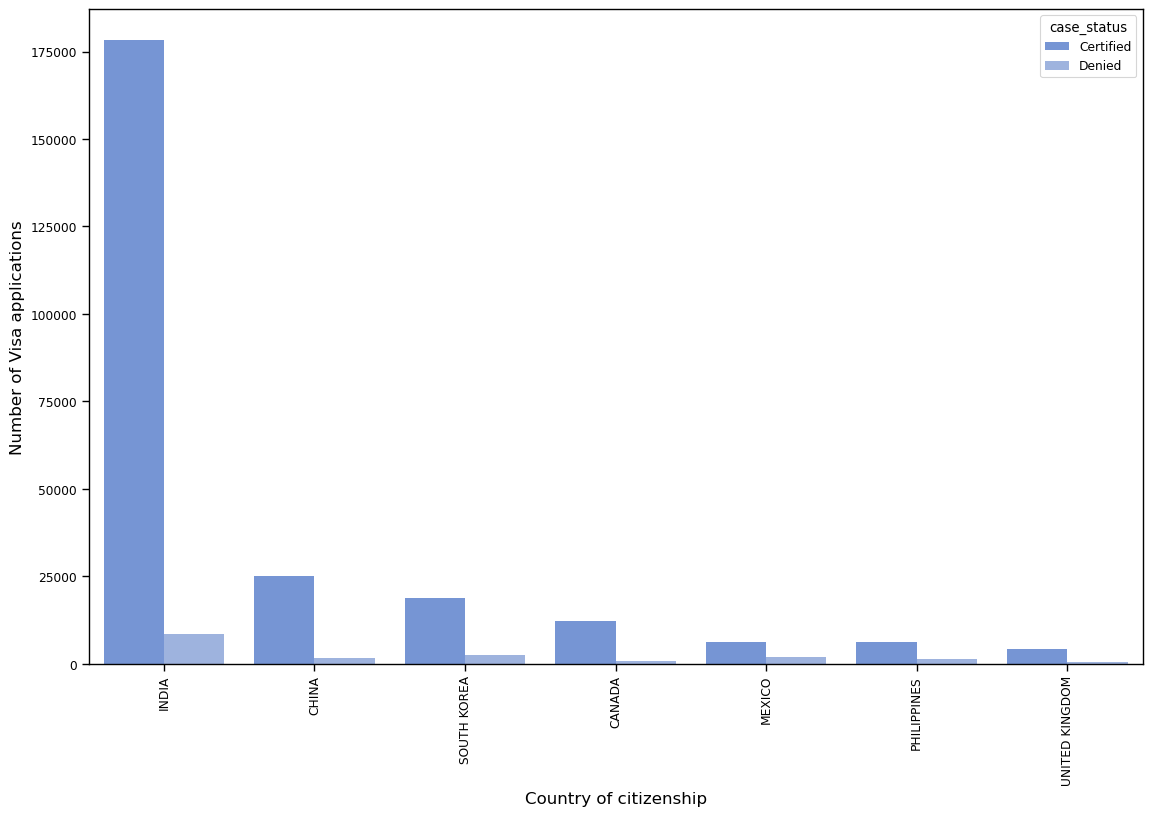

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(13.6,8.5)
sns.set_context(rc = {"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot( x='country_of_citizenship', hue='case_status', data=df, 
              palette = sns.diverging_palette(255, 133, l=60, n=7, center='light'),
              order=df['country_of_citizenship'].value_counts().iloc[:7].index )
plt.xticks(rotation = 90)
ax.set(xlabel= 'Country of citizenship', ylabel= 'Number of Visa applications')
plt.show()